# Removes metadata lines (e.g., 'imagesource:' and 'gsd:')

In [ ]:
import os

def clean_annotation_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    cleaned_lines = [line for line in lines if not line.startswith("imagesource:") and not line.startswith("gsd:")]

    with open(file_path, 'w') as file:
        file.writelines(cleaned_lines)

def clean_annotations_in_directory(directory_path):
    for root, _, files in os.walk(directory_path):
        for file in files:
            if file.endswith(".txt"):
                file_path = os.path.join(root, file)
                clean_annotation_file(file_path)
                print(f"Cleaned metadata from: {file_path}")

clean_annotations_in_directory(r"D:\DYPLOMA\DOTAv1.5\labels\train")
clean_annotations_in_directory(r"D:\DYPLOMA\DOTAv1.5\labels\val")


Cleaned metadata from: D:\DYPLOMA\DOTAv1.5\labels\train\P0000.txt
Cleaned metadata from: D:\DYPLOMA\DOTAv1.5\labels\train\P0001.txt
Cleaned metadata from: D:\DYPLOMA\DOTAv1.5\labels\train\P0002.txt
Cleaned metadata from: D:\DYPLOMA\DOTAv1.5\labels\train\P0005.txt
Cleaned metadata from: D:\DYPLOMA\DOTAv1.5\labels\train\P0008.txt
Cleaned metadata from: D:\DYPLOMA\DOTAv1.5\labels\train\P0010.txt
Cleaned metadata from: D:\DYPLOMA\DOTAv1.5\labels\train\P0011.txt
Cleaned metadata from: D:\DYPLOMA\DOTAv1.5\labels\train\P0012.txt
Cleaned metadata from: D:\DYPLOMA\DOTAv1.5\labels\train\P0013.txt
Cleaned metadata from: D:\DYPLOMA\DOTAv1.5\labels\train\P0018.txt
Cleaned metadata from: D:\DYPLOMA\DOTAv1.5\labels\train\P0020.txt
Cleaned metadata from: D:\DYPLOMA\DOTAv1.5\labels\train\P0021.txt
Cleaned metadata from: D:\DYPLOMA\DOTAv1.5\labels\train\P0022.txt
Cleaned metadata from: D:\DYPLOMA\DOTAv1.5\labels\train\P0023.txt
Cleaned metadata from: D:\DYPLOMA\DOTAv1.5\labels\train\P0025.txt
Cleaned me

# clear labels names(заміна на цифру)

In [ ]:
import os

class_names = {
    "plane": 0,
    "ship": 1,
    "storage-tank": 2,
    "baseball-diamond": 3,
    "tennis-court": 4,
    "basketball-court": 5,
    "ground-track-field": 6,
    "harbor": 7,
    "bridge": 8,
    "large-vehicle": 9,
    "small-vehicle": 10,
    "helicopter": 11,
    "roundabout": 12,
    "soccer-ball-field": 13,
    "swimming-pool": 14,
    "container-crane": 15
}

labels_dirs = (r'D:\DYPLOMA\DOTAv1.5\labels\train',r'D:\DYPLOMA\DOTAv1.5\labels\val')

# labels_dir = r"D:\DYPLOMA\DOTAv1.5\labels\train" 

def process_annotation_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    updated_lines = []
    for line in lines:
        parts = line.strip().split()
        
        if len(parts) < 9:
            continue

        class_name = parts[-2]  
        if class_name in class_names:
            class_index = class_names[class_name]
            updated_line = " ".join(parts[:-2]) + f" {class_index}\n"
            updated_lines.append(updated_line)
        else:
            print(f"Unknown class name: {class_name} in file: {file_path}")

    with open(file_path, 'w') as f:
        f.writelines(updated_lines)

for labels_dir in labels_dirs:
    print(labels_dir)
    for root, dirs, files in os.walk(labels_dir):
        for file in files:
            if file.endswith(".txt"):
                file_path = os.path.join(root, file)
                process_annotation_file(file_path)

print("Annotation files have been processed.")


D:\DYPLOMA\DOTAv1.5\labels\train
D:\DYPLOMA\DOTAv1.5\labels\val
Annotation files have been processed.


# Annotation repair (фікс само-перетину) НЕ ПОТРІБНО

In [ ]:
import os
from shapely.geometry import Polygon

def load_annotations(file_path):

    annotations = []
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split()
            coords = [(float(parts[i]), float(parts[i+1])) for i in range(0, 8, 2)]
            class_label = int(parts[8])
            polygon = Polygon(coords)
            annotations.append((polygon, class_label))
    return annotations

def save_annotations(annotations, file_path):

    with open(file_path, 'w') as file:
        for geometry, class_label in annotations:
            coords = list(geometry.exterior.coords)
            if coords[0] == coords[-1]:
                coords = coords[:-1]
            annotation_str = " ".join([f"{coord[0]} {coord[1]}" for coord in coords])
            file.write(f"{annotation_str} {class_label}\n")

def check_and_fix_self_intersections(annotations):
    fixed_annotations = []
    for polygon, class_label in annotations:

        if not polygon.is_valid:
            print(f"Self-intersection detected for class {class_label}, fixing...")
            fixed_polygon = polygon.buffer(0) 
            if not fixed_polygon.is_valid:
                print(f"Failed to fix self-intersection for class {class_label}")
            else:
                fixed_annotations.append((fixed_polygon, class_label))
        else:
            fixed_annotations.append((polygon, class_label))
    return fixed_annotations

def process_annotations(dataset_dir):
    for root, _, files in os.walk(dataset_dir):
        for file in files:
            if file.endswith(".txt"):
                file_path = os.path.join(root, file)
                print(f"Processing file: {file_path}")

                annotations = load_annotations(file_path)
            
                fixed_annotations = check_and_fix_self_intersections(annotations)
                
                save_annotations(fixed_annotations, file_path)
                print(f"Fixed annotations saved to: {file_path}")


process_annotations(r"D:\DYPLOMA\DOTAv1.5\labels\train")
process_annotations(r"D:\DYPLOMA\DOTAv1.5\labels\val")


Processing file: D:\DYPLOMA\DOTAv1.5\labels\train\P0000.txt
Fixed annotations saved to: D:\DYPLOMA\DOTAv1.5\labels\train\P0000.txt
Processing file: D:\DYPLOMA\DOTAv1.5\labels\train\P0001.txt
Fixed annotations saved to: D:\DYPLOMA\DOTAv1.5\labels\train\P0001.txt
Processing file: D:\DYPLOMA\DOTAv1.5\labels\train\P0002.txt
Fixed annotations saved to: D:\DYPLOMA\DOTAv1.5\labels\train\P0002.txt
Processing file: D:\DYPLOMA\DOTAv1.5\labels\train\P0005.txt
Fixed annotations saved to: D:\DYPLOMA\DOTAv1.5\labels\train\P0005.txt
Processing file: D:\DYPLOMA\DOTAv1.5\labels\train\P0008.txt
Fixed annotations saved to: D:\DYPLOMA\DOTAv1.5\labels\train\P0008.txt
Processing file: D:\DYPLOMA\DOTAv1.5\labels\train\P0010.txt
Fixed annotations saved to: D:\DYPLOMA\DOTAv1.5\labels\train\P0010.txt
Processing file: D:\DYPLOMA\DOTAv1.5\labels\train\P0011.txt
Fixed annotations saved to: D:\DYPLOMA\DOTAv1.5\labels\train\P0011.txt
Processing file: D:\DYPLOMA\DOTAv1.5\labels\train\P0012.txt
Fixed annotations saved

# Вивід обб на зображенні щоб переконатись що все вірно

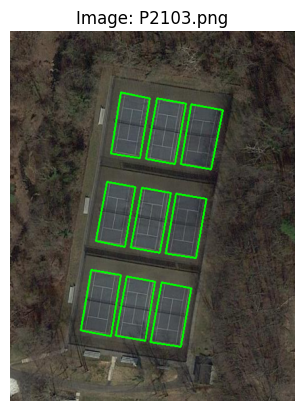

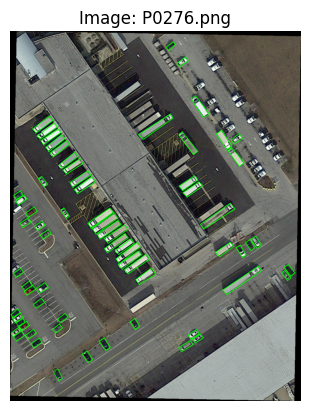

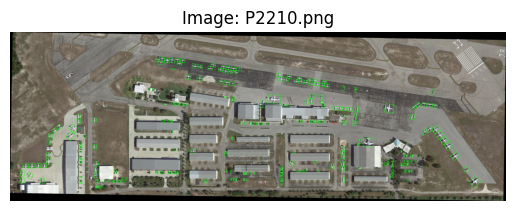

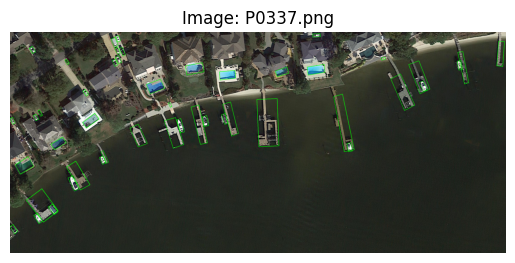

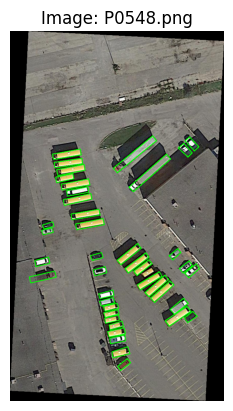

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

def read_label_file(label_path):

    with open(label_path, 'r') as file:
        labels = []
        for line in file:
            parts = line.strip().split()
            if len(parts) >= 9: 
                coords = list(map(float, parts[:8]))
                class_id = int(parts[8]) 
                labels.append((coords, class_id))
    return labels

def draw_obb(image, labels):

    for coords, class_id in labels:
        pts = [(coords[i], coords[i + 1]) for i in range(0, 8, 2)]
        pts = np.array(pts, dtype=np.int32)
        pts = pts.reshape((-1, 1, 2))

        cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=2)
    return image

def display_images_with_labels(image_dir, label_dir, num_images=5):

    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]
    selected_images = random.sample(image_files, num_images)

    for image_file in selected_images:
        image_path = os.path.join(image_dir, image_file)
        label_path = os.path.join(label_dir, image_file.replace('.jpg', '.txt').replace('.png', '.txt'))

        if os.path.exists(label_path):
            image = cv2.imread(image_path)
            labels = read_label_file(label_path)
            image_with_obb = draw_obb(image, labels)

            plt.imshow(cv2.cvtColor(image_with_obb, cv2.COLOR_BGR2RGB))
            plt.title(f"Image: {image_file}")
            plt.axis('off')
            plt.show()
        else:
            print(f"Label file not found for {image_file}")

image_dir = r"D:\DYPLOMA\DOTAv1.5\images\train"
label_dir = r"D:\DYPLOMA\DOTAv1.5\labels\train"
display_images_with_labels(image_dir, label_dir)


# Dota to 1024

test: 100%|██████████| 937/937 [23:40<00:00,  1.52s/it]


### To 1024

In [ ]:
import os
import cv2
import numpy as np
from shapely.geometry import Polygon

images_dir = r"D:\DYPLOMA\DOTAv1.5\images\val"
annotations_dir = r"D:\DYPLOMA\DOTAv1.5\labels\val"
output_images_dir = r"D:\DYPLOMA\DOTAv1.5-1024\images\val"
output_annotations_dir = r"D:\DYPLOMA\DOTAv1.5-1024\labels\val"

os.makedirs(output_images_dir, exist_ok=True)
os.makedirs(output_annotations_dir, exist_ok=True)

def load_annotations(file_path):
    annotations = []
    with open(file_path, 'r') as f:
        for line in f:
            parts = line.strip().split()
            coords = list(map(float, parts[:-1]))
            class_index = int(parts[-1])
            points = [(coords[i], coords[i+1]) for i in range(0, len(coords), 2)]
            annotations.append((points, class_index))
    return annotations

def save_annotations(file_path, annotations):
    with open(file_path, 'w') as f:
        for points, class_index in annotations:
            coords_str = ' '.join([f"{x} {y}" for x, y in points])
            f.write(f"{coords_str} {class_index}\n")

def resize_annotations(annotations, scale_x, scale_y):
    resized_annotations = []
    for points, class_index in annotations:
        resized_points = [(x * scale_x, y * scale_y) for x, y in points]
        resized_annotations.append((resized_points, class_index))
    return resized_annotations

def clip_annotations(annotations, width, height):
    clipped_annotations = []
    for points, class_index in annotations:
        clipped_points = [(min(max(0, x), width - 1), min(max(0, y), height - 1)) for x, y in points]
        polygon = Polygon(clipped_points)
        if polygon.is_valid and polygon.area > 0:
            clipped_annotations.append((clipped_points, class_index))
    return clipped_annotations

def process_image(image_path, annotation_path):
    image = cv2.imread(image_path)
    h, w = image.shape[:2]
    annotations = load_annotations(annotation_path)
    
    if max(h, w) <= 1024:
        scale_x = scale_y = 1024 / max(h, w)
        new_w, new_h = int(w * scale_x), int(h * scale_y)
        resized_image = cv2.resize(image, (new_w, new_h))
        pad_image = cv2.copyMakeBorder(resized_image, 0, 1024 - new_h, 0, 1024 - new_w, cv2.BORDER_CONSTANT)
        resized_annotations = resize_annotations(annotations, scale_x, scale_y)
        resized_annotations = clip_annotations(resized_annotations, 1024, 1024)

    elif 1025 <= max(h, w) <= 1536:
        scale_x = scale_y = 1024 / max(h, w)
        new_w, new_h = int(w * scale_x), int(h * scale_y)
        resized_image = cv2.resize(image, (new_w, new_h))
        pad_image = cv2.copyMakeBorder(resized_image, 0, 1024 - new_h, 0, 1024 - new_w, cv2.BORDER_CONSTANT)
        resized_annotations = resize_annotations(annotations, scale_x, scale_y)
        resized_annotations = clip_annotations(resized_annotations, 1024, 1024)

    elif 1537 <= max(h, w) <= 2047:
        scale_x = scale_y = 2048 / max(h, w)
        resized_image = cv2.resize(image, (int(w * scale_x), int(h * scale_y)))
        resized_annotations = resize_annotations(annotations, scale_x, scale_y)
        pad_image = cv2.copyMakeBorder(resized_image, 0, 2048 - resized_image.shape[0], 0, 2048 - resized_image.shape[1], cv2.BORDER_CONSTANT)
        tile_and_save(pad_image, resized_annotations, tile_size=1024, overlap=256)
        return

    else:
        scale_x = scale_y = 1.0
        resized_annotations = annotations
        tile_and_save(image, resized_annotations, tile_size=1024, overlap=256)
        return

    base_name = os.path.splitext(os.path.basename(image_path))[0]
    cv2.imwrite(os.path.join(output_images_dir, f"{base_name}_resized.png"), pad_image)
    save_annotations(os.path.join(output_annotations_dir, f"{base_name}_resized.txt"), resized_annotations)

def tile_and_save(image, annotations, tile_size=1024, overlap=256):
    h, w = image.shape[:2]
    step = tile_size - overlap
    base_name = os.path.splitext(os.path.basename(image_path))[0]
    
    for y in range(0, h, step):
        for x in range(0, w, step):
            tile = image[y:y + tile_size, x:x + tile_size]
            if tile.shape[0] < tile_size or tile.shape[1] < tile_size:
                tile = cv2.copyMakeBorder(tile, 0, tile_size - tile.shape[0], 0, tile_size - tile.shape[1], cv2.BORDER_CONSTANT)
            
            tile_annotations = []
            for points, class_index in annotations:
                tile_points = [(px - x, py - y) for px, py in points]
                tile_polygon = Polygon(tile_points)
                if tile_polygon.is_valid and all(0 <= px < tile_size and 0 <= py < tile_size for px, py in tile_points):
                    tile_annotations.append((tile_points, class_index))
            
            tile_annotations = clip_annotations(tile_annotations, tile_size, tile_size)

            tile_name = f"{base_name}_{x}_{y}.png"
            cv2.imwrite(os.path.join(output_images_dir, tile_name), tile)
            annotation_name = f"{base_name}_{x}_{y}.txt"
            save_annotations(os.path.join(output_annotations_dir, annotation_name), tile_annotations)

for filename in os.listdir(images_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        image_path = os.path.join(images_dir, filename)
        annotation_path = os.path.join(annotations_dir, os.path.splitext(filename)[0] + '.txt')
        process_image(image_path, annotation_path)


### Delete 0

In [ ]:
import os
from pathlib import Path

output_img_dir = Path(r"D:\DYPLOMA\DOTAv1.5-1024\images\val")
output_lbl_dir = Path(r'D:\DYPLOMA\DOTAv1.5-1024\labels\val')

for label_path in output_lbl_dir.glob('*.txt'):
    if label_path.stat().st_size == 0:
        label_path.unlink()
        
        img_path = output_img_dir / label_path.with_suffix('.png').name
        if img_path.exists():
            img_path.unlink()

print("Порожні анотації та відповідні зображення видалено.")

Порожні анотації та відповідні зображення видалено.


In [ ]:
from pathlib import Path

output_img_dir = Path(r"D:\DYPLOMA\DOTAv1.5-1024\images\val")
output_lbl_dir = Path(r'D:\DYPLOMA\DOTAv1.5-1024\labels\val')

for img_path in output_img_dir.glob('*.png'):
    label_path = output_lbl_dir / img_path.with_suffix('.txt').name
    if not label_path.exists():
        img_path.unlink()

print("Зображення без анотацій видалено.")

Зображення без анотацій видалено.


## Conver labels to yolo format

In [ ]:
import os
import cv2

annotations_dir = r"D:\DYPLOMA\DOTAv1.5-1024\labels\val_dota"
output_annotations_dir = r"D:\DYPLOMA\DOTAv1.5-1024\labels\val"
images_dir = r"D:\DYPLOMA\DOTAv1.5-1024\images\val"

os.makedirs(output_annotations_dir, exist_ok=True)

def convert_annotations(annotation_file, image_width, image_height):
    yolo_obb_annotations = []

    with open(annotation_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            
            coords = list(map(float, parts[:-1])) + [int(parts[-1])]
            x1, y1, x2, y2, x3, y3, x4, y4, class_index = coords

            x1, y1 = x1 / image_width, y1 / image_height
            x2, y2 = x2 / image_width, y2 / image_height
            x3, y3 = x3 / image_width, y3 / image_height
            x4, y4 = x4 / image_width, y4 / image_height

            yolo_obb_line = f"{int(class_index)} {x1:.6f} {y1:.6f} {x2:.6f} {y2:.6f} {x3:.6f} {y3:.6f} {x4:.6f} {y4:.6f}"
            yolo_obb_annotations.append(yolo_obb_line)

    return yolo_obb_annotations

for annotation_filename in os.listdir(annotations_dir):
    if annotation_filename.endswith('.txt'):
        image_filename = os.path.splitext(annotation_filename)[0] + '.png'
        image_path = os.path.join(images_dir, image_filename)

        if os.path.exists(image_path):
            image = cv2.imread(image_path)
            image_height, image_width = image.shape[:2]

            annotation_path = os.path.join(annotations_dir, annotation_filename)
            yolo_obb_annotations = convert_annotations(annotation_path, image_width, image_height)

            output_annotation_path = os.path.join(output_annotations_dir, annotation_filename)
            with open(output_annotation_path, 'w') as f:
                for annotation in yolo_obb_annotations:
                    f.write(annotation + '\n')

print("Conversion to YOLO OBB format completed successfully.")


Conversion to YOLO OBB format completed successfully.


### test images

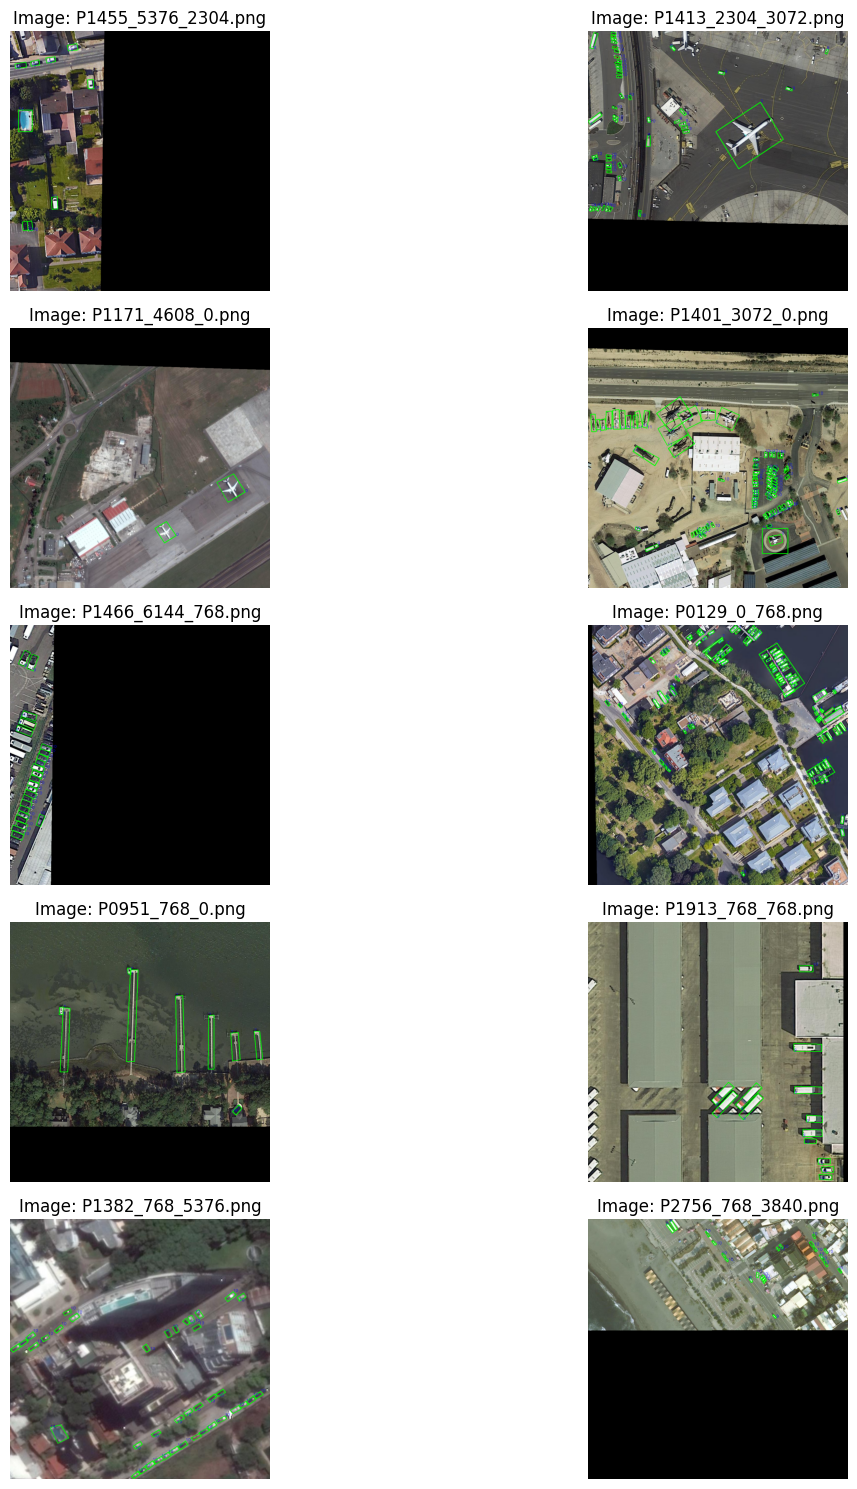

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

images_dir = r"D:\DYPLOMA\DOTAv1.5-1024\images\train"
annotations_dir = r"D:\DYPLOMA\DOTAv1.5-1024\labels\train"

def load_annotations(annotation_file, image_width, image_height):
    boxes = []

    with open(annotation_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            class_index = int(parts[0])
            x1, y1 = float(parts[1]) * image_width, float(parts[2]) * image_height
            x2, y2 = float(parts[3]) * image_width, float(parts[4]) * image_height
            x3, y3 = float(parts[5]) * image_width, float(parts[6]) * image_height
            x4, y4 = float(parts[7]) * image_width, float(parts[8]) * image_height

            boxes.append({
                "class_index": class_index,
                "points": [(int(x1), int(y1)), (int(x2), int(y2)), (int(x3), int(y3)), (int(x4), int(y4))]
            })
    return boxes

def visualize_bounding_boxes(image_path, annotation_path):
    image = cv2.imread(image_path)
    image_height, image_width = image.shape[:2]

    boxes = load_annotations(annotation_path, image_width, image_height)
    for box in boxes:
        points = box["points"]
        for i in range(4):
            start_point = points[i]
            end_point = points[(i + 1) % 4]
            cv2.line(image, start_point, end_point, (0, 255, 0), 2)

        cv2.putText(image, str(box["class_index"]), points[0], cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

annotation_files = [f for f in os.listdir(annotations_dir) if f.endswith('.txt')]

random_files = random.sample(annotation_files, min(10, len(annotation_files)))

plt.figure(figsize=(15, 15))
for i, annotation_file in enumerate(random_files):
    image_file = os.path.splitext(annotation_file)[0] + '.png' 
    image_path = os.path.join(images_dir, image_file)
    annotation_path = os.path.join(annotations_dir, annotation_file)

    image_with_boxes = visualize_bounding_boxes(image_path, annotation_path)

    plt.subplot(5, 2, i + 1)
    plt.imshow(image_with_boxes)
    plt.title(f"Image: {image_file}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# convert_dota_to_yolo_obb YOLO CODE

In [41]:
from ultralytics.data.converter import convert_dota_to_yolo_obb

convert_dota_to_yolo_obb(r"D:\DYPLOMA\DOTAv1.5")

Processing val images: 100%|██████████| 458/458 [01:09<00:00,  6.59it/s]


In [ ]:
from ultralytics.data.split_dota import split_test, split_trainval

# split train and val set, with labels.
split_trainval(
    data_root=r"D:\DYPLOMA\DOTAv1.5",
    save_dir=r"D:\DYPLOMA\DOTAv1.5-split",
    rates=[0.5, 1.0, 1.5],  # multiscale
    gap=500,
)
# split test set, without labels.
split_test(
    data_root=r"D:\DYPLOMA\DOTAv1.5",
    save_dir=r"D:\DYPLOMA\DOTAv1.5-split",
    rates=[0.5, 1.0, 1.5],  # multiscale
    gap=500,
)

Порожні анотації та відповідні зображення видалено.


In [ ]:
import os
from pathlib import Path

output_img_dir = Path(r"D:\DYPLOMA\DOTAv1.5-big\images\val")
output_lbl_dir = Path(r"D:\DYPLOMA\DOTAv1.5-big\labels\val")

for label_path in output_lbl_dir.glob('*.txt'):
    if label_path.stat().st_size == 0: 
        label_path.unlink()
        
        img_path = output_img_dir / label_path.with_suffix('.png').name
        if img_path.exists():
            img_path.unlink()

print("Порожні анотації та відповідні зображення видалено.")

Порожні анотації та відповідні зображення видалено.


In [ ]:
from pathlib import Path

output_img_dir = Path(r"D:\DYPLOMA\DOTAv1.5-big\images\val")
output_lbl_dir = Path(r"D:\DYPLOMA\DOTAv1.5-big\labels\val")

for img_path in output_img_dir.glob('*.jpg'):
    label_path = output_lbl_dir / img_path.with_suffix('.txt').name
    if not label_path.exists():
        img_path.unlink()

print("Зображення без анотацій видалено.")

Зображення без анотацій видалено.


# test lables

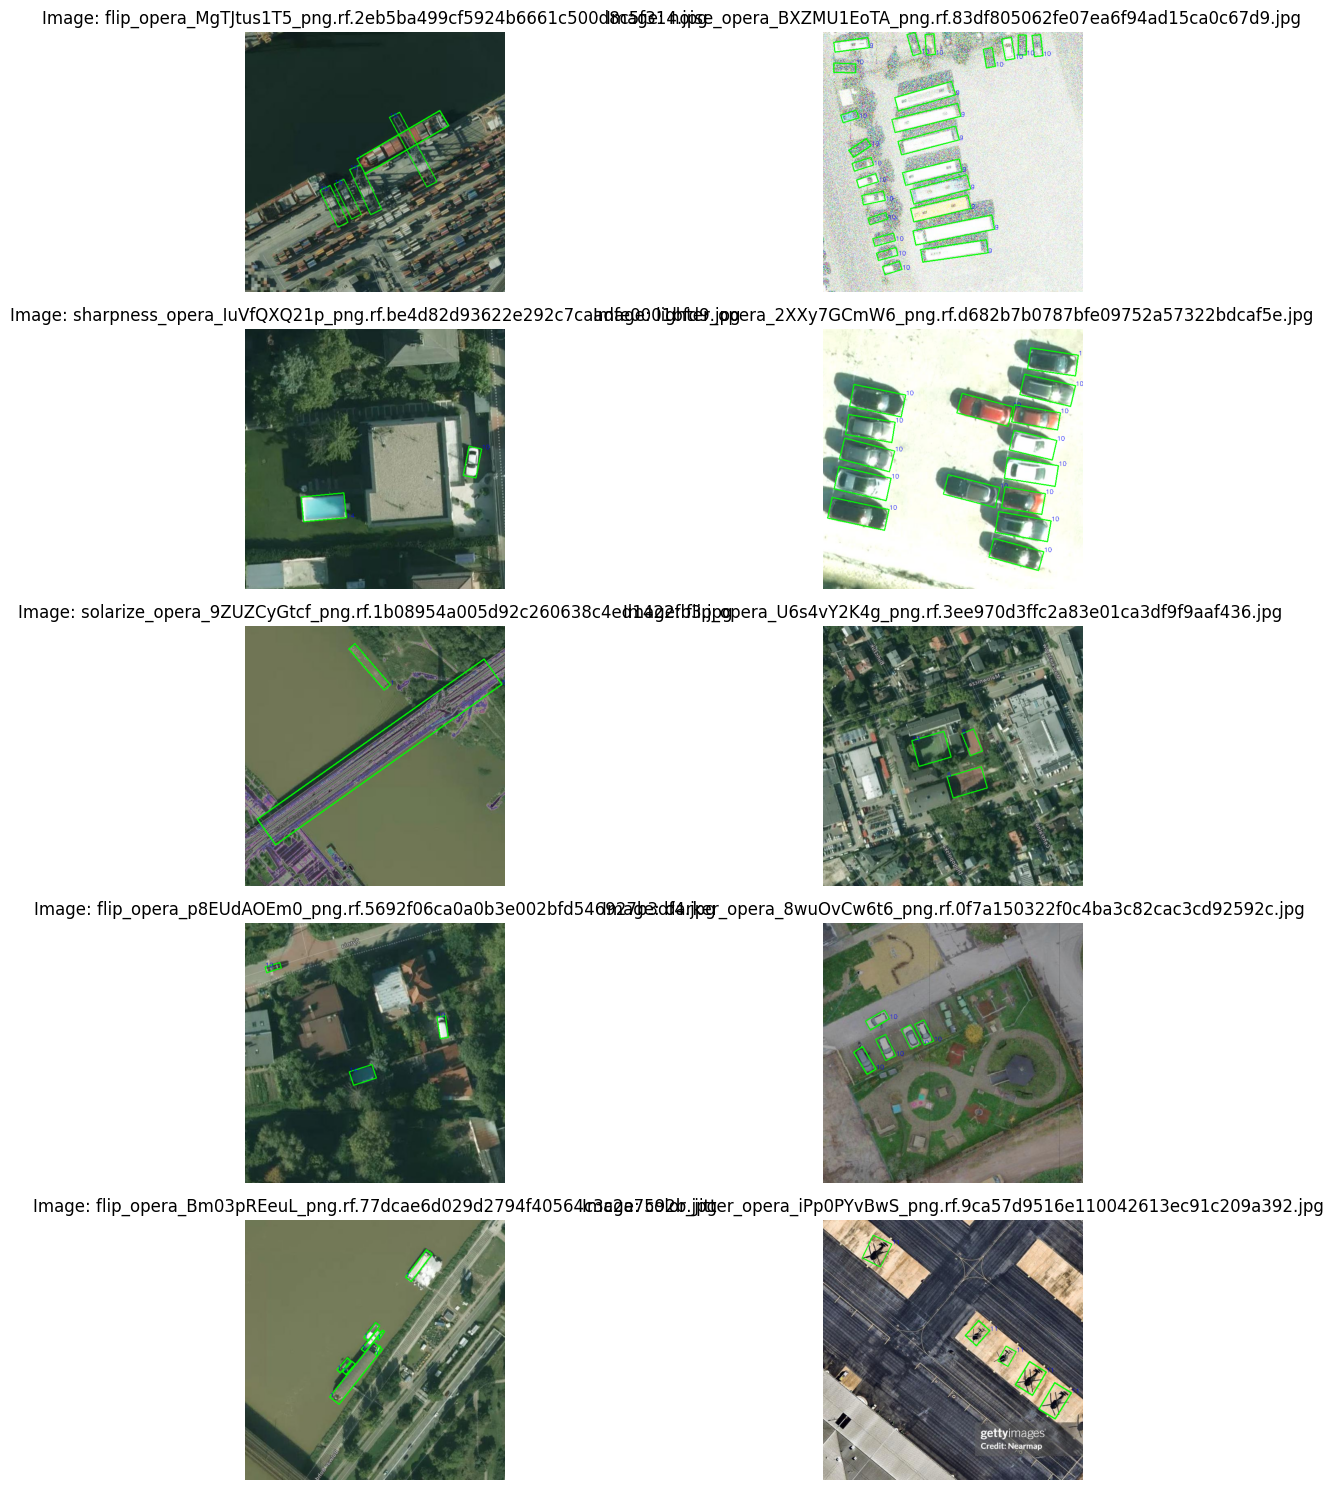

In [ ]:
import os
import cv2
import random
import matplotlib.pyplot as plt

# images_dir = r"D:\DYPLOMA\DOTAv1.5-big\images\train"
# annotations_dir = r"D:\DYPLOMA\DOTAv1.5-big\labels\train"
images_dir = r"C:\Users\dimag\Desktop\samll-dataset\output\images"
annotations_dir = r"C:\Users\dimag\Desktop\samll-dataset\output\annotations"


def load_annotations(annotation_file, image_width, image_height):
    boxes = []

    with open(annotation_file, 'r') as f:
        for line in f:
            parts = line.strip().split()
            class_index = int(parts[0])
            x1, y1 = float(parts[1]) * image_width, float(parts[2]) * image_height
            x2, y2 = float(parts[3]) * image_width, float(parts[4]) * image_height
            x3, y3 = float(parts[5]) * image_width, float(parts[6]) * image_height
            x4, y4 = float(parts[7]) * image_width, float(parts[8]) * image_height

            boxes.append({
                "class_index": class_index,
                "points": [(int(x1), int(y1)), (int(x2), int(y2)), (int(x3), int(y3)), (int(x4), int(y4))]
            })
    return boxes

def visualize_bounding_boxes(image_path, annotation_path):
    image = cv2.imread(image_path)
    image_height, image_width = image.shape[:2]

    boxes = load_annotations(annotation_path, image_width, image_height)
    for box in boxes:
        points = box["points"]
        for i in range(4):
            start_point = points[i]
            end_point = points[(i + 1) % 4] 
            cv2.line(image, start_point, end_point, (0, 255, 0), 2) 

        cv2.putText(image, str(box["class_index"]), points[0], cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image_rgb

annotation_files = [f for f in os.listdir(annotations_dir) if f.endswith('.txt')]

random_files = random.sample(annotation_files, min(10, len(annotation_files)))

plt.figure(figsize=(15, 15))
for i, annotation_file in enumerate(random_files):
    image_file = os.path.splitext(annotation_file)[0] + '.jpg' 
    image_path = os.path.join(images_dir, image_file)
    annotation_path = os.path.join(annotations_dir, annotation_file)

    image_with_boxes = visualize_bounding_boxes(image_path, annotation_path)

    plt.subplot(5, 2, i + 1)
    plt.imshow(image_with_boxes)
    plt.title(f"Image: {image_file}")
    plt.axis('off')

plt.tight_layout()
plt.show()


# OLD TEST

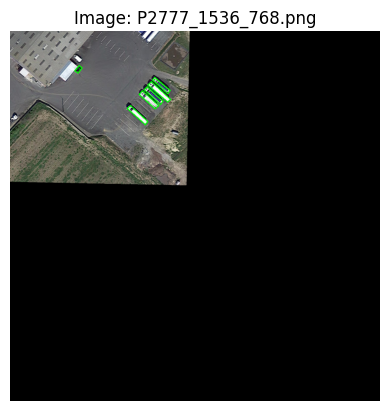

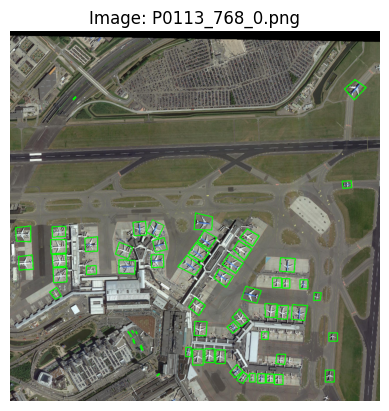

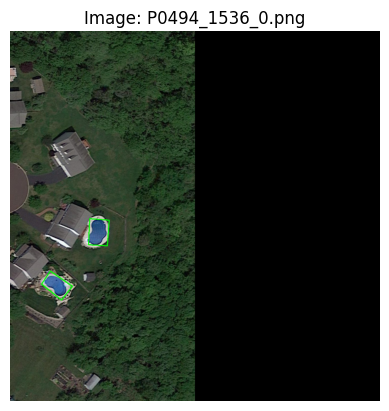

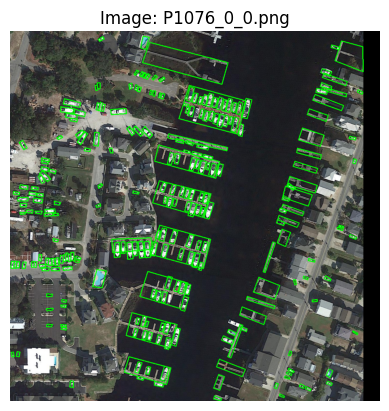

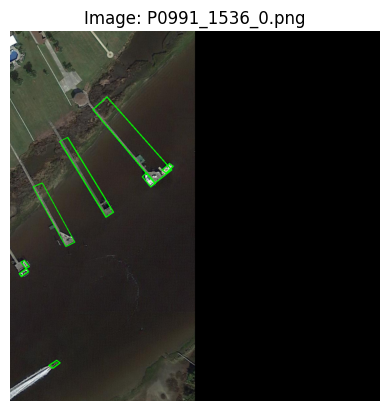

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

def read_label_file(label_path):
    with open(label_path, 'r') as file:
        labels = []
        for line in file:
            parts = line.strip().split()
            if len(parts) >= 9:  
                coords = list(map(float, parts[:8])) 
                class_id = int(parts[8])  
                labels.append((coords, class_id))
    return labels

def draw_obb(image, labels):
    for coords, class_id in labels:
        pts = [(coords[i], coords[i + 1]) for i in range(0, 8, 2)]
        pts = np.array(pts, dtype=np.int32)
        pts = pts.reshape((-1, 1, 2))

        cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=2)
    return image

def display_images_with_labels(image_dir, label_dir, num_images=5):
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')]
    selected_images = random.sample(image_files, num_images)

    for image_file in selected_images:
        image_path = os.path.join(image_dir, image_file)
        label_path = os.path.join(label_dir, image_file.replace('.jpg', '.txt').replace('.png', '.txt'))

        if os.path.exists(label_path):
            image = cv2.imread(image_path)
            labels = read_label_file(label_path)
            image_with_obb = draw_obb(image, labels)

            plt.imshow(cv2.cvtColor(image_with_obb, cv2.COLOR_BGR2RGB))
            plt.title(f"Image: {image_file}")
            plt.axis('off')
            plt.show()
        else:
            print(f"Label file not found for {image_file}")

image_dir = r"D:\DYPLOMA\DOTAv1.5\images\train_resized"
label_dir = r"D:\DYPLOMA\DOTAv1.5\labels\train_resized"
display_images_with_labels(image_dir, label_dir)


In [ ]:
import os

def validate_annotation_file(file_path):
    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file, 1):
            line = line.strip().split()
            if len(line) < 9: 
                print(f"Error in {file_path}, line {line_number}: Incorrect number of elements")
                return False
            try:
                coordinates = list(map(float, line[:8]))
                confidence = float(line[-1])
                class_name = line[8]
            except ValueError:
                print(f"Error in {file_path}, line {line_number}: Non-numeric values found")
                return False
    return True

def validate_dataset_labels(labels_dir):
    all_valid = True
    for root, _, files in os.walk(labels_dir):
        for file in files:
            if file.endswith(".txt"):
                file_path = os.path.join(root, file)
                if not validate_annotation_file(file_path):
                    all_valid = False
                    print(f"Invalid format in file: {file_path}")
    if all_valid:
        print("All annotation files are valid.")
    else:
        print("Some annotation files have invalid formats.")

validate_dataset_labels(r"D:\DYPLOMA\DOTAv1.5\labels\train")
validate_dataset_labels(r"D:\DYPLOMA\DOTAv1.5\labels\val")


All annotation files are valid.
All annotation files are valid.


# Xview

In [ ]:
import os
from pathlib import Path
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

image_dir = Path(r'D:\DYPLOMA\datasets\images\tiles\train')
label_dir = Path(r'D:\DYPLOMA\datasets\labels\tiles\train')
class_names = [
    "Fixed-wing Aircraft", "Small Aircraft", "Cargo Plane", "Helicopter", "Passenger Vehicle", 
    "Small Car", "Bus", "Pickup Truck", "Utility Truck", "Truck", "Cargo Truck", "Truck w/Box",
    "Truck Tractor", "Trailer", "Truck w/Flatbed", "Truck w/Liquid", "Crane Truck", "Railway Vehicle",
    "Passenger Car", "Cargo Car", "Flat Car", "Tank car", "Locomotive", "Maritime Vessel", "Motorboat",
    "Sailboat", "Tugboat", "Barge", "Fishing Vessel", "Ferry", "Yacht", "Container Ship", "Oil Tanker",
    "Engineering Vehicle", "Tower crane", "Container Crane", "Reach Stacker", "Straddle Carrier",
    "Mobile Crane", "Dump Truck", "Haul Truck", "Scraper/Tractor", "Front loader/Bulldozer", "Excavator",
    "Cement Mixer", "Ground Grader", "Hut/Tent", "Shed", "Building", "Aircraft Hangar", "Damaged Building",
    "Facility", "Construction Site", "Vehicle Lot", "Helipad", "Storage Tank", "Shipping container lot",
    "Shipping Container", "Pylon", "Tower"
]

def plot_image_with_boxes(img_path, lbl_path, class_names, img_size=(1024, 1024)):
    img = Image.open(img_path)
    width, height = img.size
    
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    with open(lbl_path, 'r') as f:
        for line in f:
            class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.strip().split())
            class_id = int(class_id)
            
            x_center *= width
            y_center *= height
            bbox_width *= width
            bbox_height *= height
            
            x_min = x_center - bbox_width / 2
            y_min = y_center - bbox_height / 2
            
            rect = patches.Rectangle((x_min, y_min), bbox_width, bbox_height, linewidth=1, 
                                     edgecolor='red', facecolor='none')
            ax.add_patch(rect)
            
            # ax.text(x_min, y_min - 5, class_names[class_id], color='yellow', fontsize=8, 
            #         bbox=dict(facecolor='black', alpha=0.5))

    plt.axis('off')
    plt.show()

image_files = list(image_dir.glob('*.tif'))  
for img_path in image_files[:5]:  
    # img_path = r"D:\DYPLOMA\datasets\images\tiles\train\5_1920_2560.tif"
    print(img_path)
    lbl_path = label_dir / img_path.with_suffix('.txt').name
    if lbl_path.exists():  
        plot_image_with_boxes(img_path, lbl_path, class_names)
        plt.show()
    else:
        print(f"Немає анотацій для {img_path.name}")


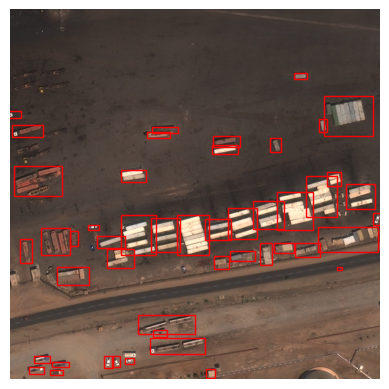

In [ ]:

img_path = Path(r"D:\DYPLOMA\datasets\images\tiles\train\5_1920_1920.tif")

lbl_path = label_dir / img_path.with_suffix('.txt').name

if lbl_path.exists():
    plot_image_with_boxes(img_path, lbl_path, class_names)
    plt.show()
else:
    print(f"Немає анотацій для {img_path.name}")


In [ ]:
import os
from pathlib import Path
from PIL import Image
import numpy as np

input_img_dir = Path(r'D:\DYPLOMA\datasets\datasets\xView\images\train') 
input_lbl_dir = Path(r'D:\DYPLOMA\datasets\datasets\xView\labels\train') 
output_img_dir = Path(r'D:\DYPLOMA\datasets\datasets\images\tiles\train')
output_lbl_dir = Path(r'D:\DYPLOMA\datasets\datasets\labels\tiles\train')
tile_size = 640

output_img_dir.mkdir(parents=True, exist_ok=True)
output_lbl_dir.mkdir(parents=True, exist_ok=True)

def adjust_bbox(bbox, x_offset, y_offset, tile_size):
    x_center, y_center, width, height = bbox
    x_center = (x_center - x_offset) / tile_size
    y_center = (y_center - y_offset) / tile_size
    width = width / tile_size
    height = height / tile_size
    return x_center, y_center, width, height

def split_image(image_path, label_path, output_img_dir, output_lbl_dir, tile_size=640):
    img = Image.open(image_path)
    img_width, img_height = img.size
    base_name = image_path.stem

    bboxes = []
    if label_path.exists():
        with open(label_path, 'r') as f:
            for line in f:
                class_id, x_center, y_center, width, height = map(float, line.strip().split())
                x_center *= img_width
                y_center *= img_height
                width *= img_width
                height *= img_height
                bboxes.append((class_id, x_center, y_center, width, height))

    for i in range(0, img_width, tile_size):
        for j in range(0, img_height, tile_size):
            box = (i, j, min(i + tile_size, img_width), min(j + tile_size, img_height))
            tile = img.crop(box)
            
            tile_name = f"{base_name}_{i}_{j}.jpg"
            tile_path = output_img_dir / tile_name
            tile.save(tile_path)

            tile_bboxes = []
            for class_id, x_center, y_center, width, height in bboxes:
                if (i <= x_center <= i + tile_size) and (j <= y_center <= j + tile_size):
                    x_tile, y_tile, w_tile, h_tile = adjust_bbox(
                        (x_center, y_center, width, height), i, j, tile_size
                    )
                    tile_bboxes.append((class_id, x_tile, y_tile, w_tile, h_tile))

            if tile_bboxes:
                label_tile_path = output_lbl_dir / tile_name.replace('.jpg', '.txt')
                with open(label_tile_path, 'w') as f:
                    for class_id, x_tile, y_tile, w_tile, h_tile in tile_bboxes:
                        f.write(f"{int(class_id)} {x_tile:.6f} {y_tile:.6f} {w_tile:.6f} {h_tile:.6f}\n")

for img_file in input_img_dir.glob('*.jpg'):
    lbl_file = input_lbl_dir / img_file.with_suffix('.txt').name
    split_image(img_file, lbl_file, output_img_dir, output_lbl_dir, tile_size)


In [ ]:
import os
from pathlib import Path
from PIL import Image

image_dir = Path(r'D:\DYPLOMA\datasets\images\tiles\train') 
label_dir = Path(r'D:\DYPLOMA\datasets\labels\tiles\train') 

for img_path in image_dir.glob('*.tif'):
    with Image.open(img_path) as img:
        width, height = img.size
        
        if width != 640 or height != 640:
            print(f"Видалення зображення: {img_path.name} (Розмір: {width}x{height})")
            
            os.remove(img_path)
            
            lbl_path = label_dir / img_path.with_suffix('.txt').name
            if lbl_path.exists():
                os.remove(lbl_path)
                print(f"Видалено файл анотацій: {lbl_path.name}")


In [ ]:
import os
from pathlib import Path
import shutil
import random

image_dir = Path(r"D:\DYPLOMA\datasets\images\tiles\train") 
label_dir = Path(r"D:\DYPLOMA\datasets\labels\tiles\train") 

train_image_dir = Path(r"D:\DYPLOMA\datasets\New_dataset\xView\images\train")
val_image_dir = Path(r"D:\DYPLOMA\datasets\New_dataset\xView\images\val")
train_label_dir = Path(r"D:\DYPLOMA\datasets\New_dataset\xView\labels\train")
val_label_dir = Path(r"D:\DYPLOMA\datasets\New_dataset\xView\labels\val")

train_image_dir.mkdir(parents=True, exist_ok=True)
val_image_dir.mkdir(parents=True, exist_ok=True)
train_label_dir.mkdir(parents=True, exist_ok=True)
val_label_dir.mkdir(parents=True, exist_ok=True)

image_files = list(image_dir.glob('*.tif')) 

random.shuffle(image_files)
train_files = image_files[:int(0.9 * len(image_files))]
val_files = image_files[int(0.9 * len(image_files)):]

def move_files(files, src_image_dir, src_label_dir, dest_image_dir, dest_label_dir):
    for img_path in files:
        dest_img_path = dest_image_dir / img_path.name
        shutil.move(img_path, dest_img_path)
        
        label_file = src_label_dir / img_path.with_suffix('.txt').name
        if label_file.exists():
            dest_label_path = dest_label_dir / label_file.name
            shutil.move(label_file, dest_label_path)

move_files(train_files, image_dir, label_dir, train_image_dir, train_label_dir)
move_files(val_files, image_dir, label_dir, val_image_dir, val_label_dir)

print(f"Переміщено {len(train_files)} зображень для тренування і {len(val_files)} зображень для валідації.")
